In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("./income_cleaned.csv")

In [33]:
df.shape

(32537, 15)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  fiftyplus       32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [37]:
df['age'].dtype

dtype('int64')

In [38]:
#fetching categorical/string columns only...
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
# fetching numeric columns list
numeric_features = [feature for feature in df.columns if df[feature].dtype =='int64'] 

In [39]:
df['fiftyplus'].value_counts(normalize=True) * 100 # getting how many percentage values in type columns....

<=50K    75.907428
>50K     24.092572
Name: fiftyplus, dtype: float64

[Text(0, 0, '24698'), Text(0, 0, '7839')]

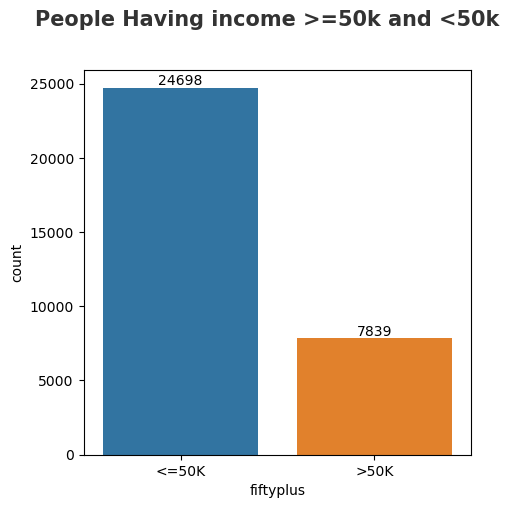

In [40]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('People Having income >=50k and <50k ', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['fiftyplus'])

abs_values = df['fiftyplus'].value_counts(ascending=False).values

gr.bar_label(container=gr.containers[0], labels=abs_values)


[Text(0, 0, '21775'), Text(0, 0, '10762')]

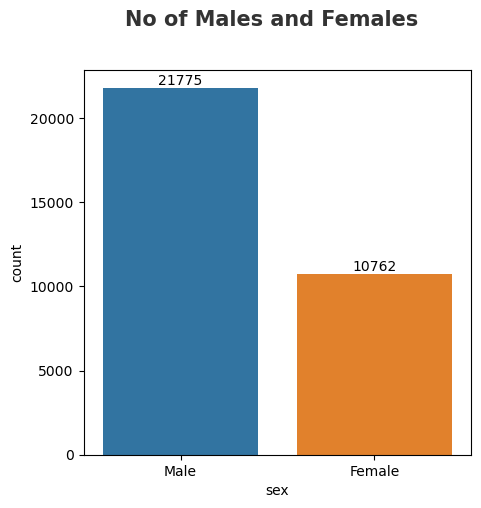

In [41]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('No of Males and Females', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['sex'])
abs_values = df['sex'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

In [42]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


[Text(0, 0, '22673'),
 Text(0, 0, '2540'),
 Text(0, 0, '2093'),
 Text(0, 0, '1836'),
 Text(0, 0, '1298'),
 Text(0, 0, '1116'),
 Text(0, 0, '960'),
 Text(0, 0, '14'),
 Text(0, 0, '7')]

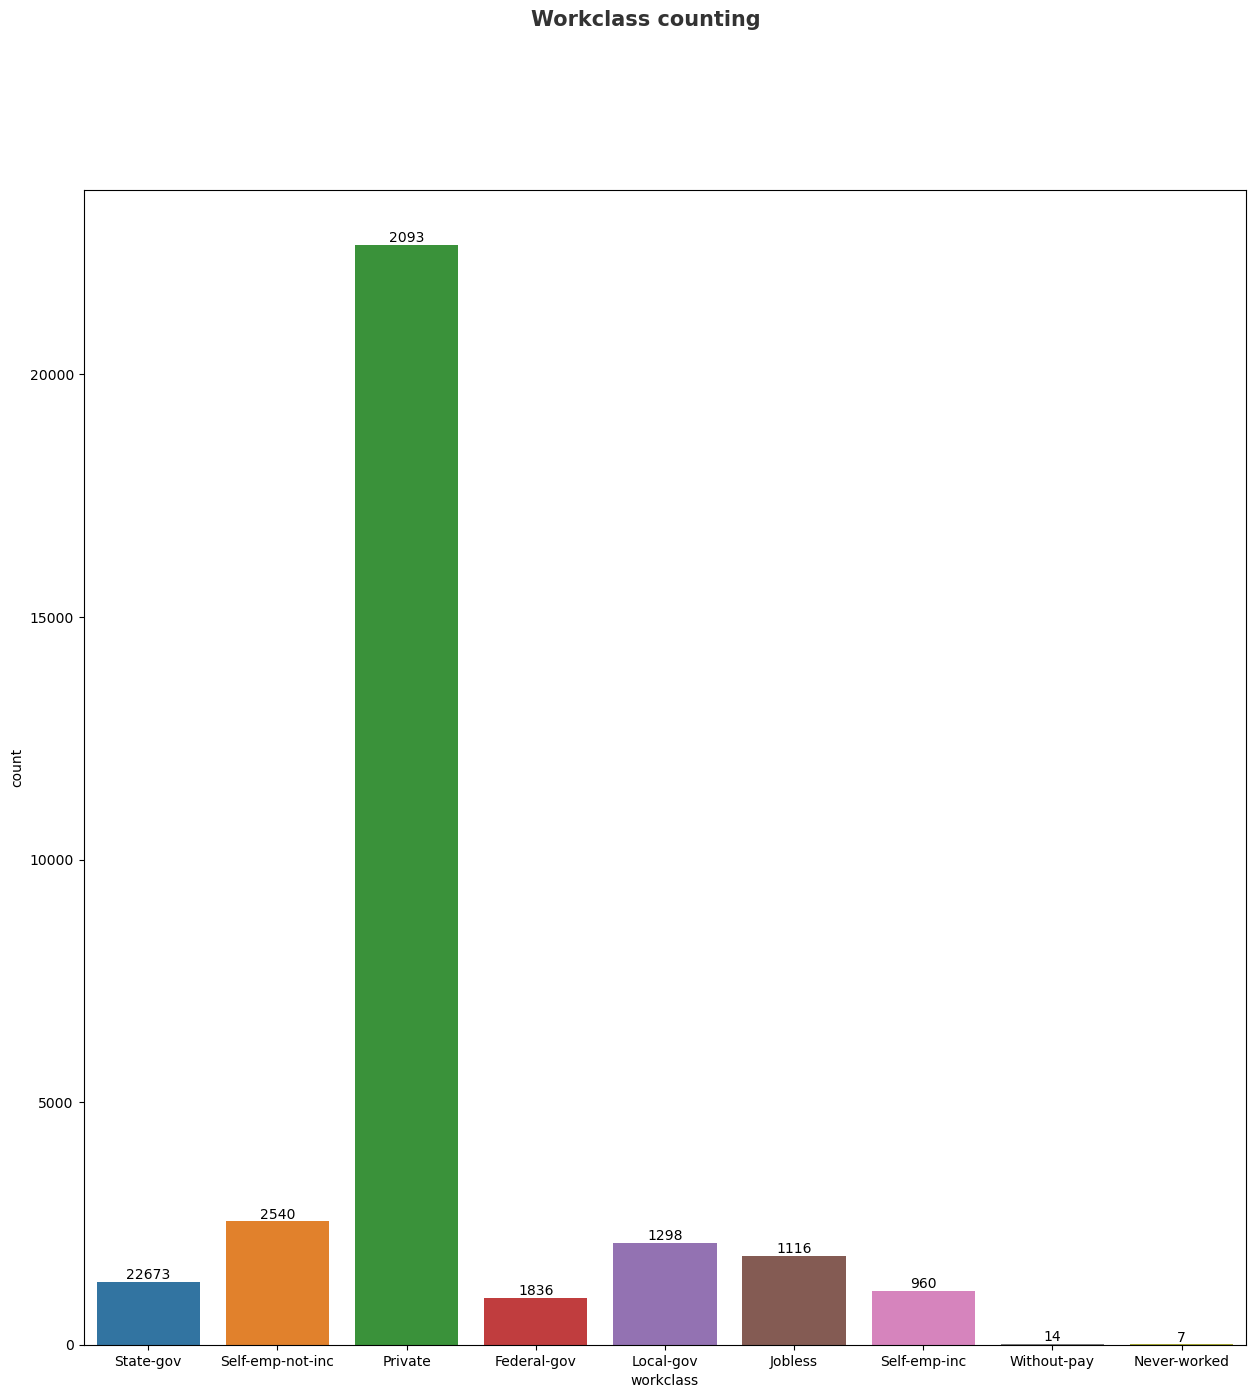

In [43]:
#number of people with workclass ratio
# number of people working in different workclass with jobless numbers also 
plt.figure(figsize=(15, 15))
plt.suptitle('Workclass counting', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['workclass'])
abs_values = df['workclass'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

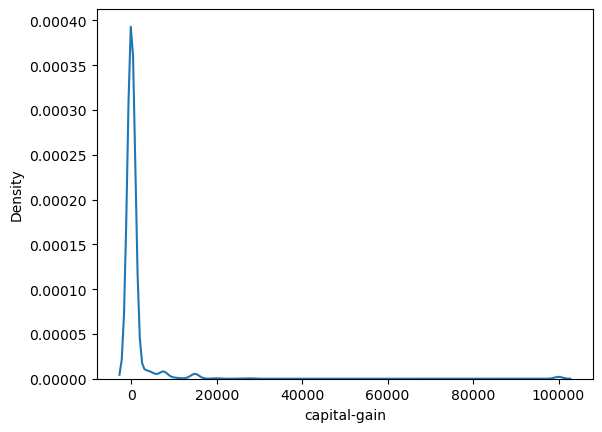

In [44]:
sns.kdeplot(df['capital-gain']) # right skewed...

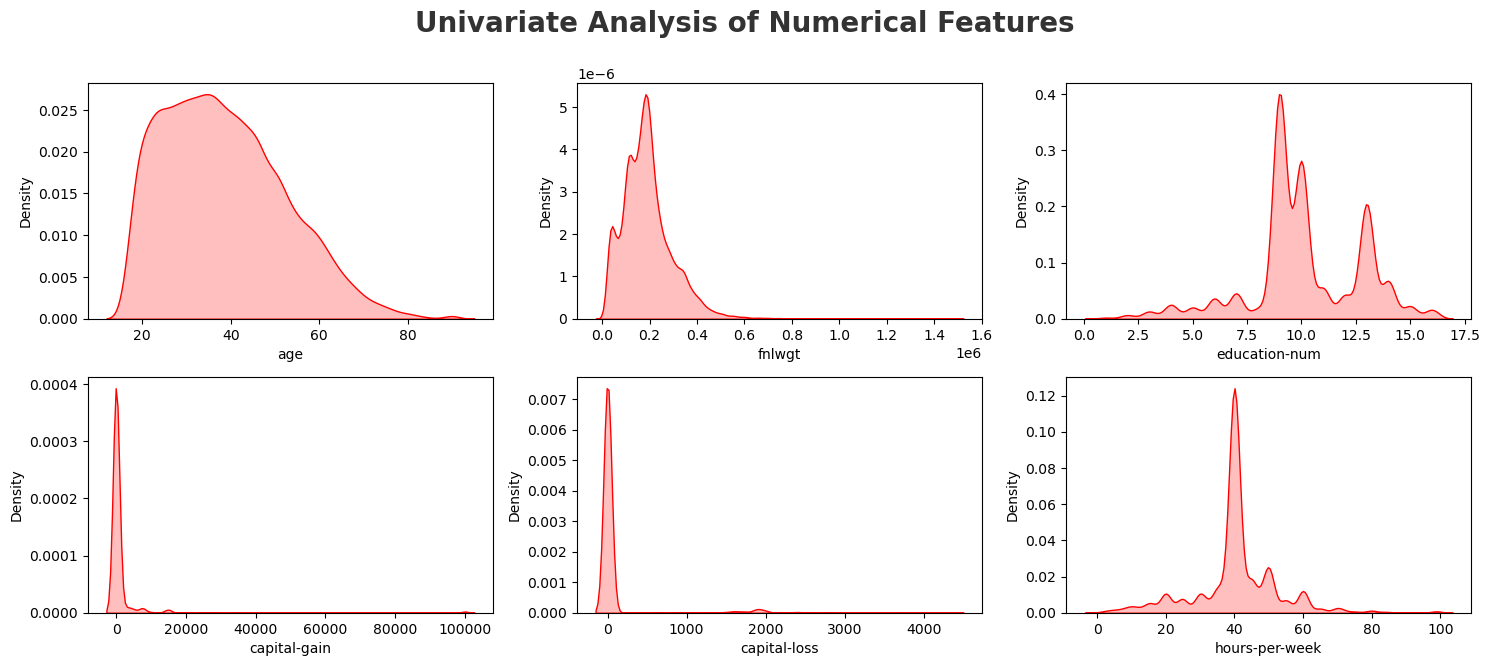

In [45]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [46]:
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<AxesSubplot:ylabel='occupation'>

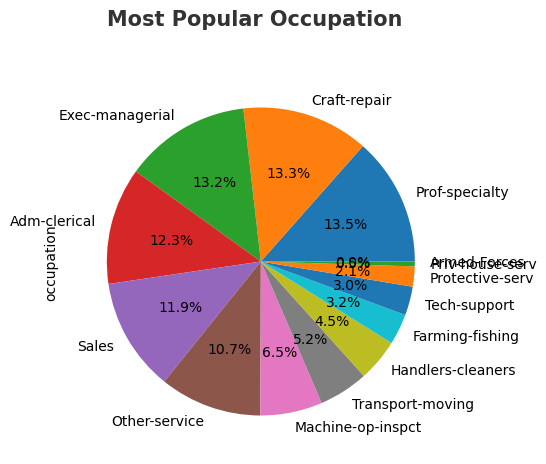

In [47]:
plt.suptitle('Most Popular Occupation', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['occupation'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most popular occupation...

<AxesSubplot:ylabel='education'>

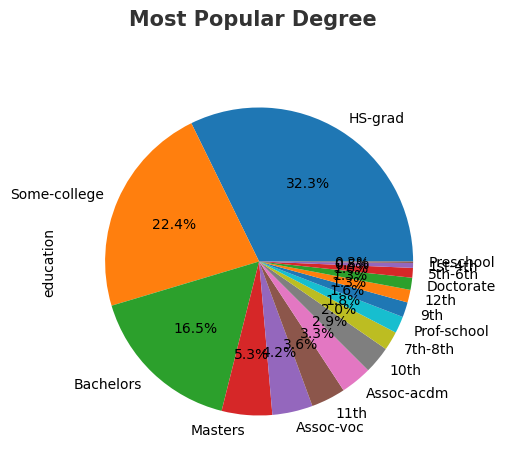

In [48]:
plt.suptitle('Most Popular Degree', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['education'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most education degree...

In [49]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


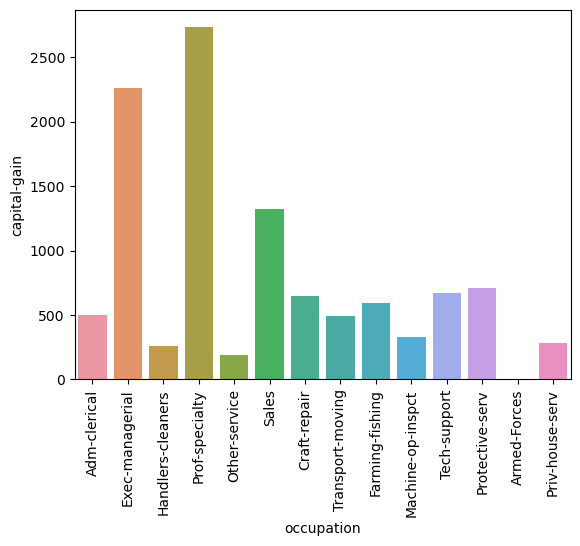

In [50]:
# relationship between occupation-wise capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot('occupation','capital-gain',data=df, ci = None)
plt.show()

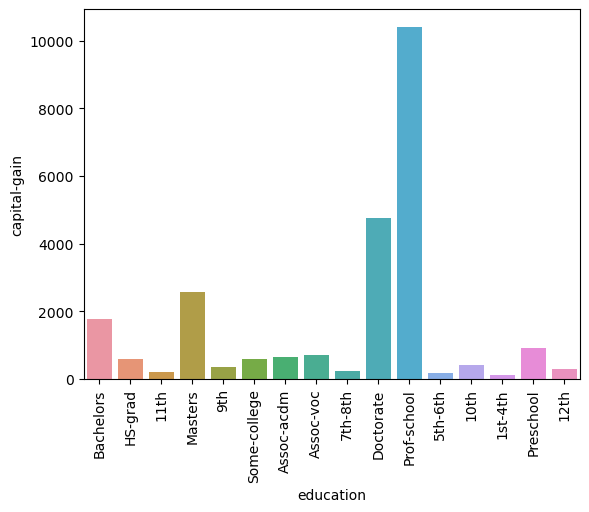

In [51]:
# relationship between education-wise and capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot('education','capital-gain',data=df, ci = None)
plt.show()

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

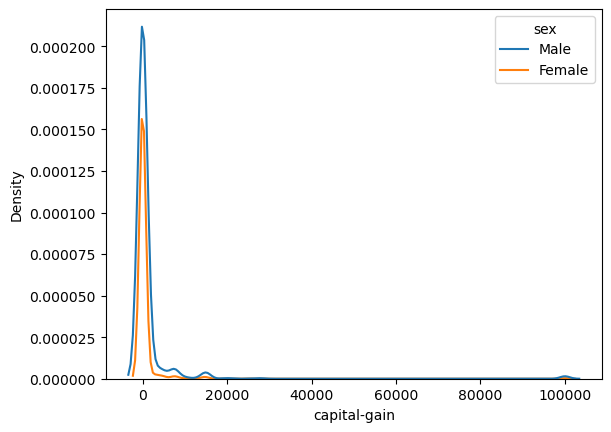

In [52]:
# comparison of capital gain between gender
sns.kdeplot(x='capital-gain', data=df, hue='sex')

<AxesSubplot:title={'center':'Gender wise income'}, xlabel='fiftyplus,sex'>

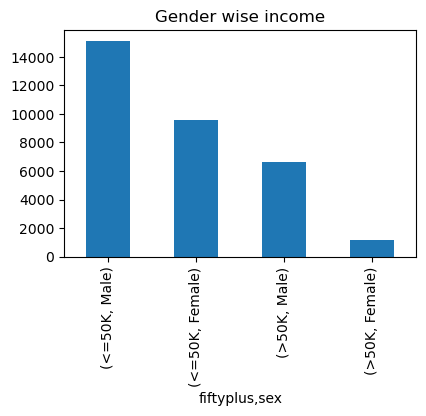

In [53]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('fiftyplus')['sex'].value_counts().plot(kind='bar', 
                                     title='Gender wise income')

In [54]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


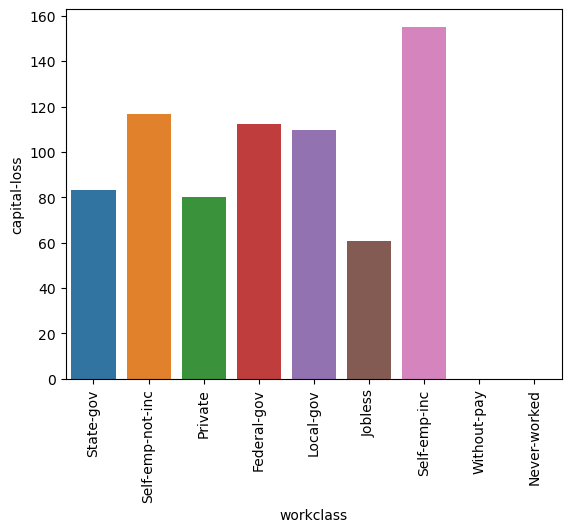

In [55]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot('workclass','capital-loss',data=df, ci = None)
plt.show()

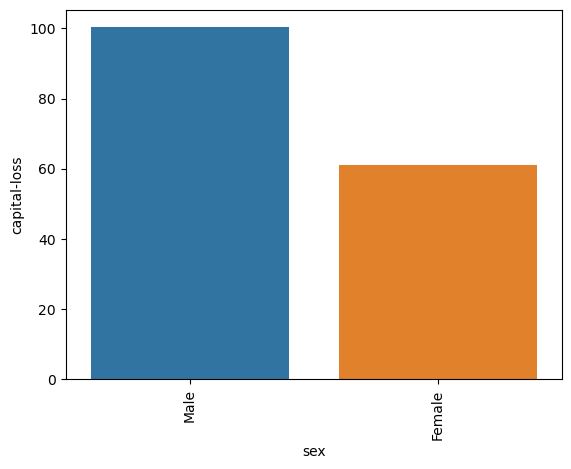

In [56]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot('sex','capital-loss',data=df, ci = None)
plt.show()

In [57]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

<AxesSubplot:title={'center':'Race wise income'}, xlabel='race,fiftyplus'>

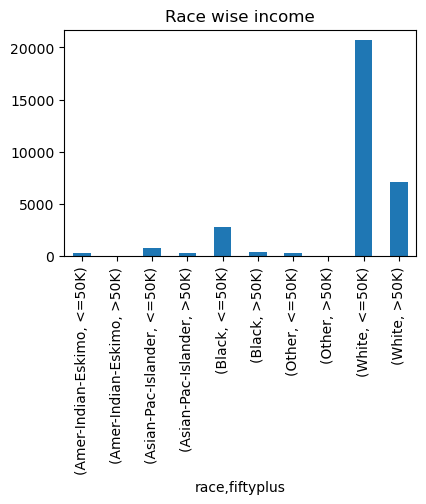

In [58]:
# does race wise income of the people..
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('race')['fiftyplus'].value_counts().plot(kind='bar', 
                                     title='Race wise income')

In [59]:
#finding total capital-loss by gender-wise- who is losing more male/female 
gr = df.groupby('sex')['capital-loss'].sum().sort_values(ascending=False).T
gr


sex
Male      2183648
Female     659052
Name: capital-loss, dtype: int64

In [60]:
#top 5 capital loss by gender group

groupedDF = df.groupby(['sex','capital-loss'],sort=False).sum()
sortedDF = groupedDF.sort_values('capital-loss', ascending=False)

sortedDF[:5]

age  fnlwgt  education-num  capital-gain  hours-per-week
sex    capital-loss                                                          
Female 4356          238  395984             28             0              98
       3900           95  405022             14             0              80
Male   3770           38  150601              6             0              40
Female 3770           34  216864              9             0              45
       3683          142  510651             25             0              60

In [61]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
malegroup = gr.get_group('Male').sort_values('capital-gain', ascending=False)
malegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
10845,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
17782,42,Self-emp-not-inc,201908,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
12089,24,Jobless,151153,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
31089,22,Self-emp-not-inc,214014,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
9225,46,Private,273771,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K


In [66]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
femalegroup = gr.get_group('Female').sort_values('capital-gain', ascending=False)
femalegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
22796,33,Private,134886,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,99999,0,30,United-States,>50K
4656,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,United-States,>50K
6000,51,Private,44000,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,50,United-States,>50K
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,>50K
19075,52,Self-emp-not-inc,140985,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,30,United-States,>50K


In [67]:
male5 = malegroup[0:5]
male5 = male5[['capital-gain','hours-per-week']]


In [68]:
female5 = femalegroup[0:5]
female5 = female5[['capital-gain','hours-per-week']]
female5


,capital-gain,hours-per-week
22796,99999,30
4656,99999,40
6000,99999,50
1826,99999,40
19075,99999,30


In [69]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='hours-per-week', ylabel='occupation'>

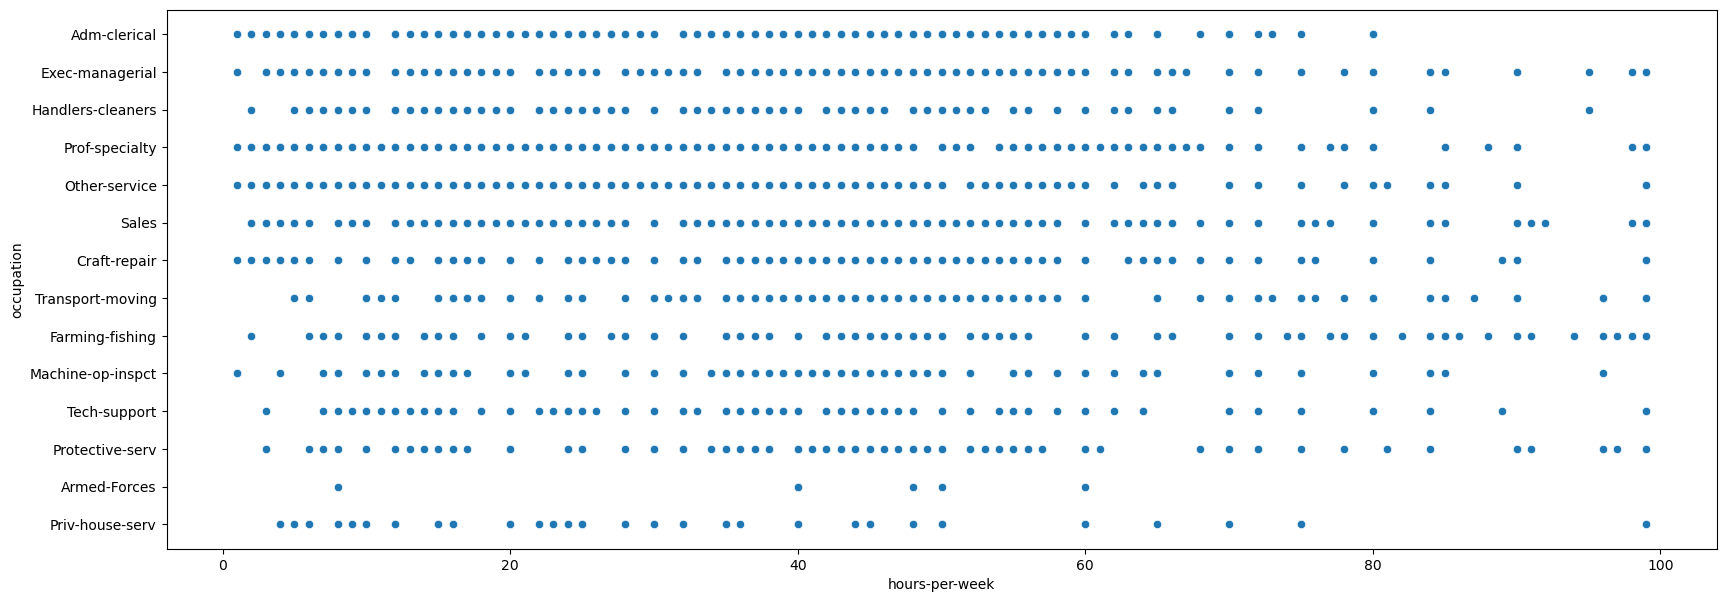

In [70]:
#occupation hour-per-week working time
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x='hours-per-week', y='occupation')

In [71]:
# list of people who are from US and having morethan 50k income..
df[((df['native-country']=='United-States') & (df['fiftyplus']=='>50K'))]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,71,Jobless,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32521,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32530,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [72]:
### most workclass with same education of most capital gained by people...
df.groupby(['workclass','education'])['capital-gain'].sum().sort_values(ascending=False).reset_index()

,workclass,education,capital-gain
0,Private,Bachelors,5986789
1,Private,HS-grad,3512854
2,Private,Some-college,2619106
3,Private,Masters,2604542
4,Private,Prof-school,2466799
...,...,...,...
112,Never-worked,HS-grad,0
113,Never-worked,Some-college,0
114,Self-emp-inc,1st-4th,0
115,Self-emp-inc,5th-6th,0


In [73]:
## average age/capital-gain/vapital-loss/hours-per-week of people in workclass
print(df.groupby(["workclass"]).mean())

                        age         fnlwgt  education-num  capital-gain  \
workclass                                                                 
Federal-gov       42.590625  185221.243750      10.973958    833.232292   
Jobless           40.960240  188516.338235       9.260349    606.795752   
Local-gov         41.751075  188639.712852      11.042045    880.202580   
Never-worked      20.571429  225989.571429       7.428571      0.000000   
Private           36.801835  192764.252768       9.881136    890.119834   
Self-emp-inc      46.017025  175981.344086      11.137097   4875.693548   
Self-emp-not-inc  44.968110  175660.661024      10.226378   1886.804331   
State-gov         39.436055  184136.613251      11.375963    701.699538   
Without-pay       47.785714  174267.500000       9.071429    487.857143   

                  capital-loss  hours-per-week  
workclass                                       
Federal-gov         112.268750       41.379167  
Jobless              60.760

In [74]:
## average age
print(df.groupby(["fiftyplus"]).mean())

                 age         fnlwgt  education-num  capital-gain  \
fiftyplus                                                          
<=50K      36.787392  190345.926796       9.596081    148.884970   
>50K       44.250925  188000.480674      11.612195   4007.164562   

           capital-loss  hours-per-week  
fiftyplus                                
<=50K         53.190258       38.842862  
>50K         195.051282       45.473402  
